## Plot Generation Code for Ablation Studies
#### Stores results from train runs across several iterations of model params

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from typing import Dict

sns.set()

In [28]:
def gen_plot(
        mins_per_step: Dict,
        val_loss: Dict,
        title: str,
        min_x: int = 0,
        max_x: int = 600,
        step_x: int = 50,
        yaxis: str = "Validation Loss"
):
    """
    Generate a plot with given parameters for validation loss stored in dictionary by key, with time per step/epoch in val losses
    """
    compute_xticks = range(min_x, max_x+1, step_x)
    plt.figure(figsize=(8,6))
    for label in mins_per_step.keys():
        model_mins_vs_epoch = [batch * mins_per_step[label] for batch in list(range(1, len(val_loss[label])+1))]
        plt.plot(model_mins_vs_epoch, val_loss[label], label=label)
    plt.xticks(compute_xticks)
    plt.title(title)
    plt.xlim(min_x-0.01, max_x+0.01)
    plt.xlabel("Compute (GPU minutes on a T4)")
    plt.ylabel(yaxis)
    plt.legend()
    plt.show()

In [18]:
def get_losses(model_names: str, data_path: str):
    """
    Get train and validation loss from processed output files from train runs stored in given folder, each title [model_name].txt and stored in CSV format
    """
    val_loss = {}
    train_loss = {}
    for model in model_names:
        res = np.genfromtxt(f"{data_path}{model}.txt", delimiter=',', skip_header=1)
        train_loss[model] = res[:, 0]
        val_loss[model] = res[:, 1]
    return train_loss, val_loss

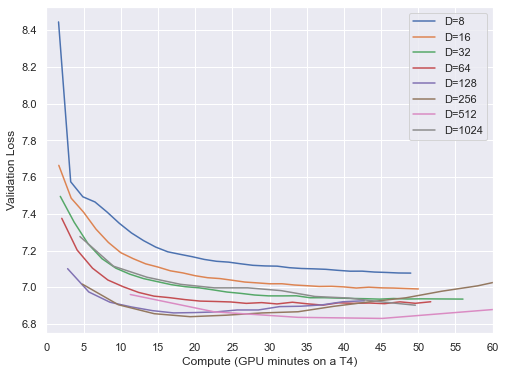

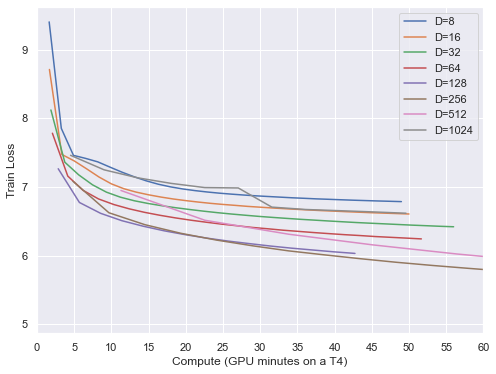

In [43]:
mins_per_model = {
    "D=8":      1.633,
    "D=16":     1.667,
    "D=32":     1.867,
    "D=64":     2.067,
    "D=128":    2.85,
    "D=256":    4.833,
    "D=512":    11.283,
    "D=1024":   4.51
}

train_loss, val_loss = get_losses(list(mins_per_model.keys()), "../data/small-results/")

gen_plot(
    mins_per_model,
    val_loss,
    "", #"Small-scale Data: Ablation Study of Dimension (L=4, H=4)",
    0,
    60,
    5
)

gen_plot(
    mins_per_model,
    train_loss,
    "", #"Small-scale Data: Compute vs. Train Loss (L=4, H=4)",
    0,
    60,
    5,
    yaxis="Train Loss"
)


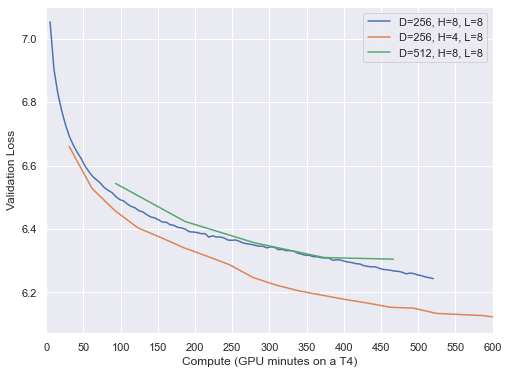

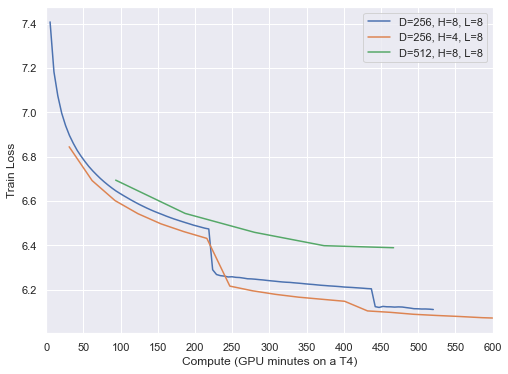

In [44]:
mins_per_batch = {
    'D=256, H=8, L=8': 312.17/60,
    'D=256, H=4, L=8': 1851.03/60,
    'D=512, H=8, L=8': 5602.62/60
}

train_loss, val_loss = get_losses(list(mins_per_batch.keys()), "../data/big-results/")

gen_plot(
    mins_per_batch,
    val_loss,
    "", #"Large-scale Data: Ablation Study of Dimension",
    0,
    600,
    50
)

gen_plot(
    mins_per_batch,
    train_loss,
    "", #"Large-scale Data: Compute vs. Train Loss",
    0,
    600,
    50,
    yaxis="Train Loss"
)


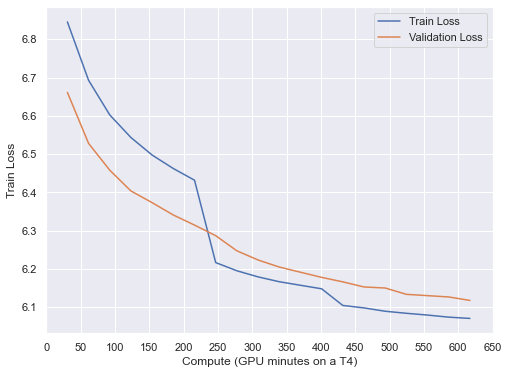

In [41]:
best_model = 'D=256, H=4, L=8'

train_loss, val_loss = get_losses([best_model], "../data/big-results/")

loss = {
    "Train Loss": train_loss[best_model],
    "Validation Loss": val_loss[best_model]
}

m_p_b = {
    "Train Loss": mins_per_batch[best_model],
    "Validation Loss": mins_per_batch[best_model]
}

gen_plot(
    m_p_b,
    loss,
    "", #f"Best Model ({best_model}): Compute vs. Train and Validation Loss",
    0,
    650,
    50,
    yaxis="Train Loss"
)